In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
customers = pd.read_csv(r'C:\Users\sanja\Downloads\Customers.csv')
products = pd.read_csv(r'C:\Users\sanja\Downloads\Products.csv')
transactions = pd.read_csv(r'C:\Users\sanja\Downloads\Transactions.csv')

In [8]:
print("Customers Dataset:")
print(customers.head())
print(customers.info())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [9]:
print("\nProducts Dataset:")
print(products.head())
print(products.info())


Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None


In [10]:
print("\nTransactions Dataset:")
print(transactions.head())
print(transactions.info())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         100

In [11]:
def check_missing(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

In [12]:
check_missing(customers, 'Customers')
check_missing(products, 'Products')
check_missing(transactions, 'Transactions')

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64




In [13]:
print("\nCustomer Analysis:")
region_counts = customers['Region'].value_counts()
print(region_counts)


Customer Analysis:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


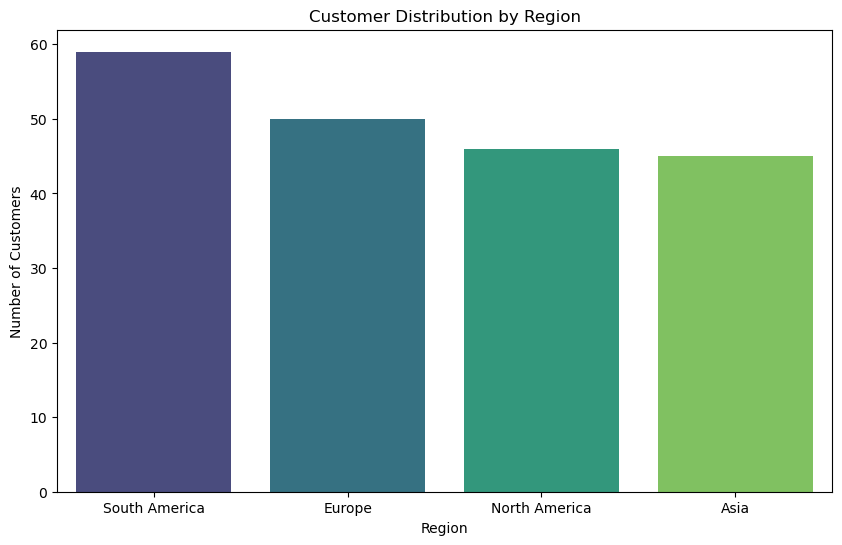

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [15]:
print("\nProduct Analysis:")
category_counts = products['Category'].value_counts()
print(category_counts)


Product Analysis:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


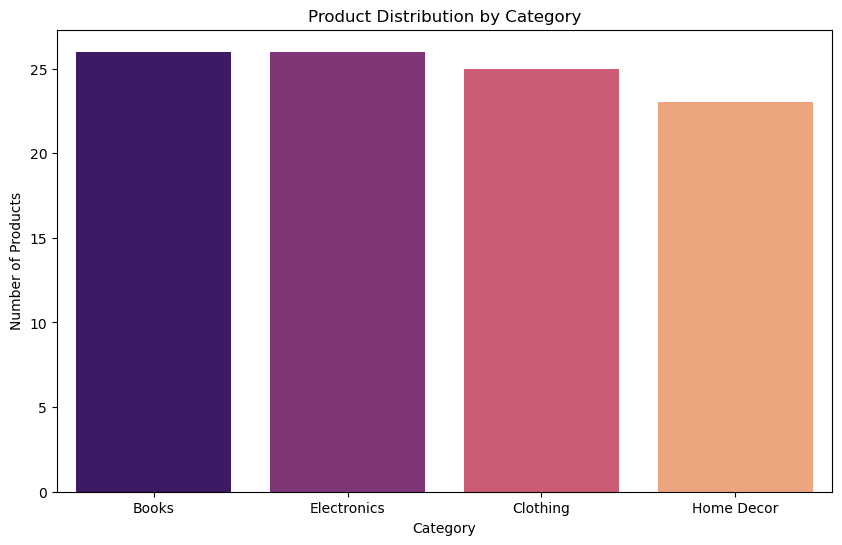

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [17]:
print("\nTransactions Analysis:")
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_by_date = transactions.groupby('TransactionDate')['TotalValue'].sum()


Transactions Analysis:


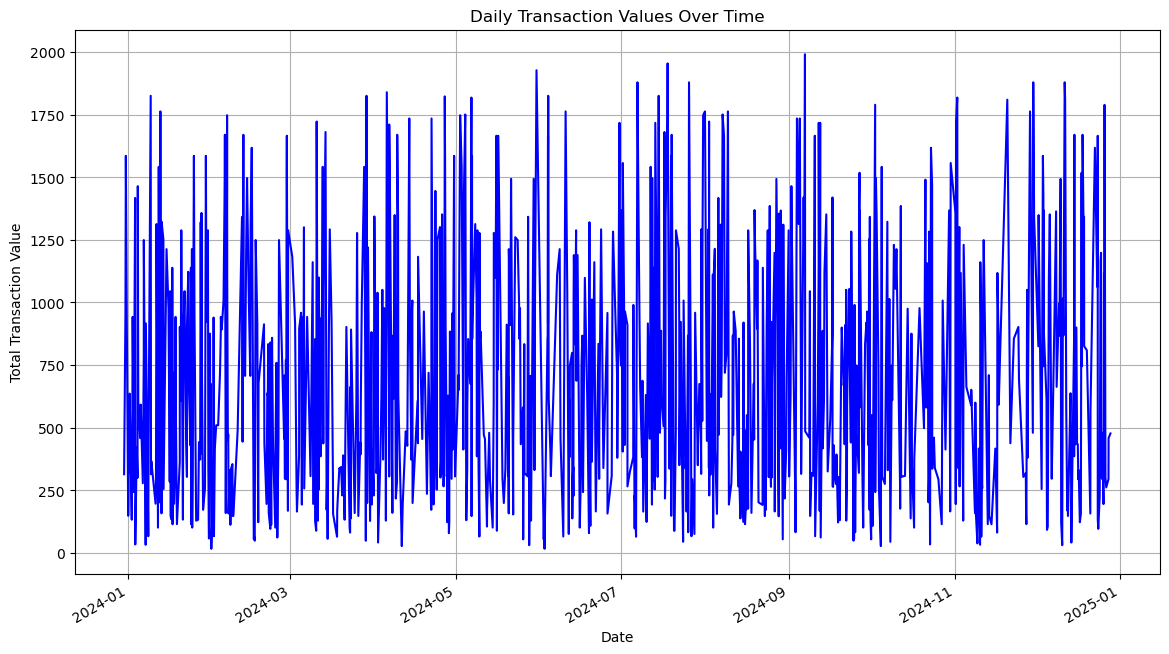

In [18]:
plt.figure(figsize=(14, 8))
transactions_by_date.plot(kind='line', color='blue')
plt.title('Daily Transaction Values Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Value')
plt.grid()
plt.show()